In [18]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from branca.element import Template, MacroElement
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [7]:
listing_7_df = pd.read_csv('../datasets/arr_7_df.csv', index_col=0)
listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f


## Heat Map by listing

In [12]:
# Create a map centered around the mean latitude and longitude
map_center = [listing_7_df['latitude'].mean(), listing_7_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Prepare the data: Extract latitude, longitude, and optionally a weight (Crime ID)
# Assuming 'Crime_ID' or a similar column exists, adjust the column name accordingly
heat_data = [[row['latitude'], row['longitude'], row['id']] for index, row in listing_7_df.iterrows()]

# Create the heatmap layer
HeatMap(heat_data).add_to(mymap)

# Display the map
mymap

# Heat map by number of reviews

In [85]:
# Create a map centered around the mean latitude and longitude
map_center = [listing_7_df['latitude'].mean(), listing_7_df['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=10)

# Prepare the data: Extract latitude, longitude, and optionally a weight (Crime ID)
# Assuming 'Crime_ID' or a similar column exists, adjust the column name accordingly
heat_data = [[row['latitude'], row['longitude'], row['number_of_reviews']] for index, row in listing_7_df.iterrows()]

# Create the heatmap layer
HeatMap(heat_data).add_to(mymap)

# Display the map
mymap

## Need to look into a way to compare the two above, this can give a view of the competion in the neighbourhood

In [16]:
listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f


# General Analysis

# Grouping by intereting columns in relation to number of listings

In [25]:
listing_7_df.groupby(['property_type', 'room_type', 'bedrooms', 'bathrooms']).agg({'id':'count'}).sort_values(by='id', ascending=False).head(20)

id
property_type               room_type       bedrooms bathrooms     
Entire rental unit          Entire home/apt 1.0      1.0        626
                                            0.0      1.0        138
                                            2.0      1.0        134
                                                     2.0         75
                                            1.0      1.5         56
Private room in rental unit Private room    1.0      1.0         45
Entire rental unit          Entire home/apt 3.0      2.0         40
                                            2.0      1.5         24
                                            3.0      2.5         19
Entire condo                Entire home/apt 1.0      1.0         18
Entire rental unit          Entire home/apt 2.0      2.5         15
                                            3.0      1.0         13
                                                     3.0         10
                                            4.0      2.0          9
Room in boutique hotel      Hotel room      1.0      1.0          8
Entire rental unit          Entire home/apt 0.0      1.5          7
Entire loft                 Entire home/apt 1.0      1.0          7
Entire rental unit          Entire home/apt 3.0      1.5          6
Room in hotel               Private room    1.0      1.0          6
Private room in rental unit Private room    1.0      1.5          6

## looking into number of bedrooms and bathrooms

In [72]:
bed_bath_df = listing_7_df.groupby(['bedrooms', 'bathrooms']).agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()
bed_bath_df


,bedrooms,bathrooms,id
0,1.0,1.0,735
1,0.0,1.0,151
2,2.0,1.0,141
3,2.0,2.0,82
4,1.0,1.5,71
5,3.0,2.0,44
6,2.0,1.5,31
7,2.0,2.5,21
8,3.0,2.5,21
9,3.0,1.0,13


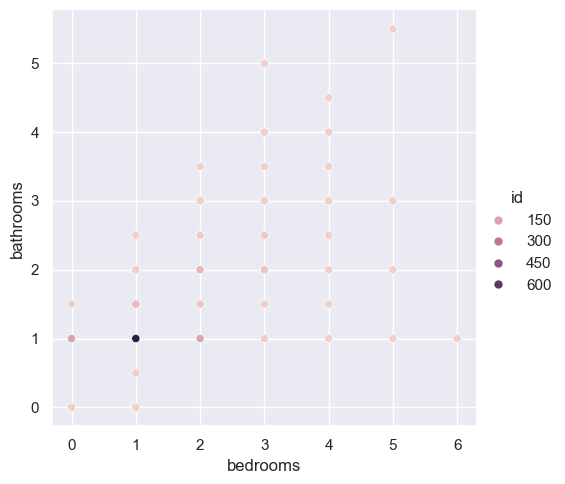

In [73]:
sns.relplot(data=bed_bath_df, x='bedrooms', y='bathrooms', hue='id')

# Making a pivot table to help with plotting the data into a heatmap

In [74]:
bath_bed_pivot = (
    bed_bath_df.pivot(index="bedrooms", columns="bathrooms", values="id")
)

In [75]:
bath_bed_pivot.fillna(0, inplace=True)
bath_bed_pivot

bathrooms,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5
bedrooms,,,,,,,,,,,,
0.0,4.0,0.0,151.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,2.0,4.0,735.0,71.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,141.0,31.0,82.0,21.0,7.0,1.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,13.0,6.0,44.0,21.0,10.0,6.0,2.0,0.0,1.0,0.0
4.0,0.0,0.0,1.0,2.0,9.0,4.0,4.0,3.0,4.0,1.0,0.0,0.0
5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='bathrooms', ylabel='bedrooms'>

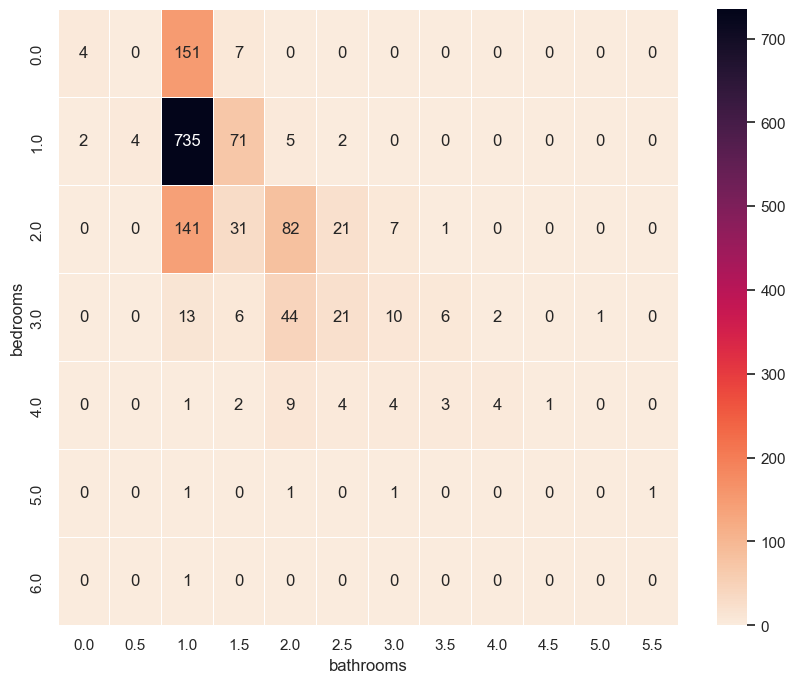

In [76]:
# Set the figure size (width, height)
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(bath_bed_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

## How does looking at number of listing compare to number of comments?

In [50]:
listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f


In [69]:
bed_bath_n_review_df = listing_7_df.groupby(['bedrooms', 'bathrooms']).agg({'number_of_reviews':'sum'}).sort_values(by='number_of_reviews', ascending=False).reset_index()
bed_bath_n_review_df

,bedrooms,bathrooms,number_of_reviews
0,1.0,1.0,27257
1,0.0,1.0,7629
2,2.0,1.0,5020
3,1.0,1.5,3022
4,2.0,2.0,1714
5,3.0,2.0,1606
6,2.0,1.5,1496
7,2.0,2.5,988
8,3.0,1.0,777
9,3.0,2.5,700


In [70]:
bath_bed_n_review_pivot = bed_bath_n_review_df.pivot(index="bedrooms", columns="bathrooms", values="number_of_reviews")
bath_bed_n_review_pivot.fillna(0, inplace=True)
bath_bed_n_review_pivot

bathrooms,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5
bedrooms,,,,,,,,,,,,
0.0,409.0,0.0,7629.0,184.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,7.0,51.0,27257.0,3022.0,194.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,5020.0,1496.0,1714.0,988.0,558.0,7.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,777.0,99.0,1606.0,700.0,321.0,237.0,10.0,0.0,13.0,0.0
4.0,0.0,0.0,5.0,15.0,111.0,105.0,117.0,5.0,12.0,1.0,0.0,0.0
5.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='bathrooms', ylabel='bedrooms'>

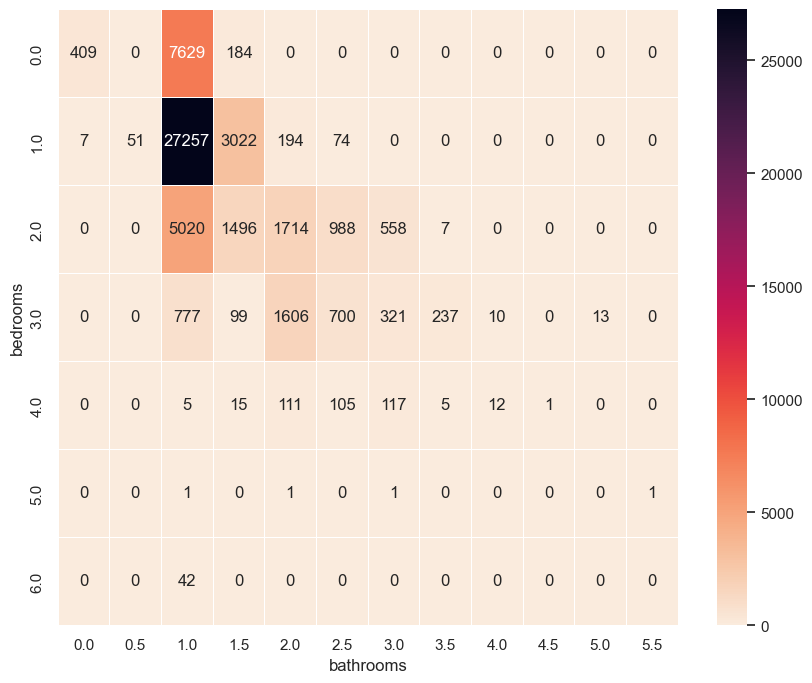

In [71]:
# Set the figure size (width, height)
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(bath_bed_n_review_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

## Looking into host_response_time and host_response_rate

In [60]:
listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f


In [68]:
host_response_n_review_df = listing_7_df.groupby(['host_response_time', 'host_response_rate']).agg({'number_of_reviews':'sum'}).reset_index()
# Drop rows where 'host_response_time' is 'no_data'
host_response_n_review_df.drop(host_response_n_review_df[host_response_n_review_df['host_response_time'] == 'no_data'].index, inplace=True)
host_response_n_review_df

,host_response_time,host_response_rate,number_of_reviews
0,a few days or more,0%,375
1,a few days or more,10%,90
2,a few days or more,14%,2
3,a few days or more,20%,1
4,a few days or more,25%,3
...,...,...,...
65,within an hour,95%,9
66,within an hour,96%,555
67,within an hour,97%,733
68,within an hour,98%,2015


## A heatamp is also a good option to plot this information

In [77]:
host_response_n_review_pivot = host_response_n_review_df.pivot(index="host_response_time", columns="host_response_rate", values="number_of_reviews")
host_response_n_review_pivot.fillna(0, inplace=True)
host_response_n_review_pivot

host_response_rate,0%,10%,100%,14%,20%,25%,30%,33%,38%,40%,43%,50%,57%,60%,63%,65%,67%,68%,70%,71%,72%,74%,75%,77%,78%,80%,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%
host_response_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a few days or more,375.0,90.0,0.0,2.0,1.0,3.0,50.0,54.0,37.0,16.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
within a day,0.0,0.0,1689.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,3.0,53.0,143.0,5.0,41.0,43.0,0.0,3.0,1.0,37.0,63.0,2.0,20.0,237.0,0.0,5.0,34.0,9.0,0.0,898.0,22.0,0.0,16.0,67.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
within a few hours,0.0,0.0,7842.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.0,0.0,0.0,0.0,7.0,0.0,11.0,31.0,2.0,0.0,142.0,0.0,0.0,8.0,0.0,0.0,6.0,213.0,0.0,0.0,0.0,0.0,33.0,18.0,4.0,0.0,3.0
within an hour,0.0,0.0,29630.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,15.0,0.0,0.0,12.0,0.0,0.0,2.0,58.0,71.0,3.0,682.0,4.0,39.0,1030.0,4.0,15.0,78.0,659.0,9.0,555.0,733.0,2015.0,411.0


In [79]:
# Convert host_response_rate to numeric values (if they are stored as percentages or strings)
host_response_n_review_pivot.columns = host_response_n_review_pivot.columns.str.rstrip('%').astype(float)

# Sort the columns by the host_response_rate (percentages)
host_response_n_review_pivot = host_response_n_review_pivot.reindex(sorted(host_response_n_review_pivot.columns), axis=1)

# Display the sorted pivot table
host_response_n_review_pivot


host_response_rate,0.0,10.0,14.0,20.0,25.0,30.0,33.0,38.0,40.0,43.0,50.0,57.0,60.0,63.0,65.0,67.0,68.0,70.0,71.0,72.0,74.0,75.0,77.0,78.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
host_response_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a few days or more,375.0,90.0,2.0,1.0,3.0,50.0,54.0,37.0,16.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
within a day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.0,3.0,53.0,143.0,5.0,41.0,43.0,0.0,3.0,1.0,37.0,63.0,2.0,20.0,237.0,0.0,5.0,34.0,9.0,0.0,898.0,22.0,0.0,16.0,67.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1689.0
within a few hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,239.0,0.0,0.0,0.0,7.0,0.0,11.0,31.0,2.0,0.0,142.0,0.0,0.0,8.0,0.0,0.0,6.0,213.0,0.0,0.0,0.0,0.0,33.0,18.0,4.0,0.0,3.0,7842.0
within an hour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,15.0,0.0,0.0,12.0,0.0,0.0,2.0,58.0,71.0,3.0,682.0,4.0,39.0,1030.0,4.0,15.0,78.0,659.0,9.0,555.0,733.0,2015.0,411.0,29630.0


<Axes: xlabel='host_response_rate', ylabel='host_response_time'>

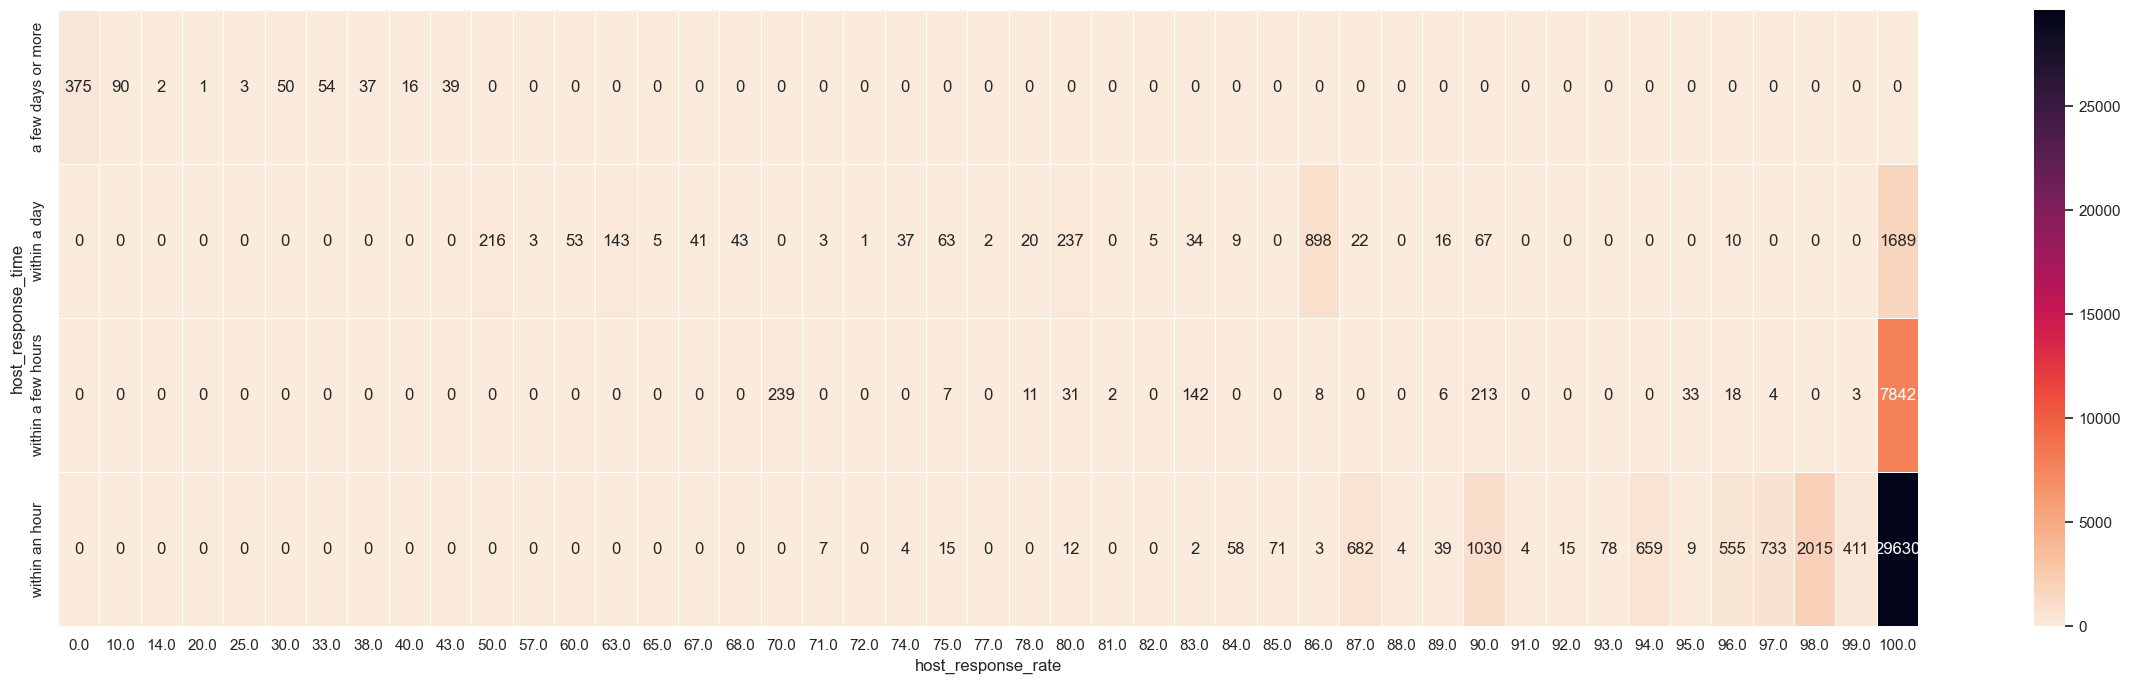

In [83]:
# Set the figure size (width, height)
plt.figure(figsize=(30, 8))

# Create the heatmap
sns.heatmap(host_response_n_review_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

### Is this still the case for airbnbs with 1 bed and 1 bath?

In [87]:
host_response_n_review_1b_df = listing_7_df[(listing_7_df['bathrooms'] == 1) & (listing_7_df['bedrooms'] == 1)].groupby(['host_response_time', 'host_response_rate']).agg({'number_of_reviews':'sum'}).reset_index()
# Drop rows where 'host_response_time' is 'no_data'
host_response_n_review_1b_df.drop(host_response_n_review_1b_df[host_response_n_review_1b_df['host_response_time'] == 'no_data'].index, inplace=True)
host_response_n_review_1b_df

,host_response_time,host_response_rate,number_of_reviews
0,a few days or more,0%,251
1,a few days or more,10%,90
2,a few days or more,20%,1
3,a few days or more,25%,1
4,a few days or more,30%,50
5,a few days or more,33%,19
6,a few days or more,38%,24
7,a few days or more,40%,8
8,a few days or more,43%,39
10,within a day,100%,777


In [88]:
host_response_n_review_1b_pivot = host_response_n_review_1b_df.pivot(index="host_response_time", columns="host_response_rate", values="number_of_reviews")
host_response_n_review_1b_pivot.fillna(0, inplace=True)

# Convert host_response_rate to numeric values (if they are stored as percentages or strings)
host_response_n_review_1b_pivot.columns = host_response_n_review_1b_pivot.columns.str.rstrip('%').astype(float)

# Sort the columns by the host_response_rate (percentages)
host_response_n_review_1b_pivot = host_response_n_review_1b_pivot.reindex(sorted(host_response_n_review_1b_pivot.columns), axis=1)

# Display the sorted pivot table
host_response_n_review_1b_pivot


host_response_rate,0.0,10.0,20.0,25.0,30.0,33.0,38.0,40.0,43.0,50.0,57.0,60.0,63.0,65.0,67.0,68.0,70.0,71.0,72.0,74.0,75.0,77.0,78.0,80.0,82.0,83.0,84.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
host_response_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a few days or more,251.0,90.0,1.0,1.0,50.0,19.0,24.0,8.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
within a day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0,2.0,1.0,8.0,5.0,41.0,43.0,0.0,3.0,1.0,13.0,63.0,2.0,4.0,80.0,5.0,0.0,0.0,19.0,10.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,777.0
within a few hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,236.0,0.0,0.0,0.0,2.0,0.0,1.0,31.0,0.0,142.0,0.0,6.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,32.0,16.0,4.0,0.0,1.0,4937.0
within an hour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,11.0,0.0,2.0,58.0,3.0,682.0,4.0,20.0,196.0,4.0,11.0,592.0,0.0,331.0,722.0,521.0,82.0,14626.0


<Axes: xlabel='host_response_rate', ylabel='host_response_time'>

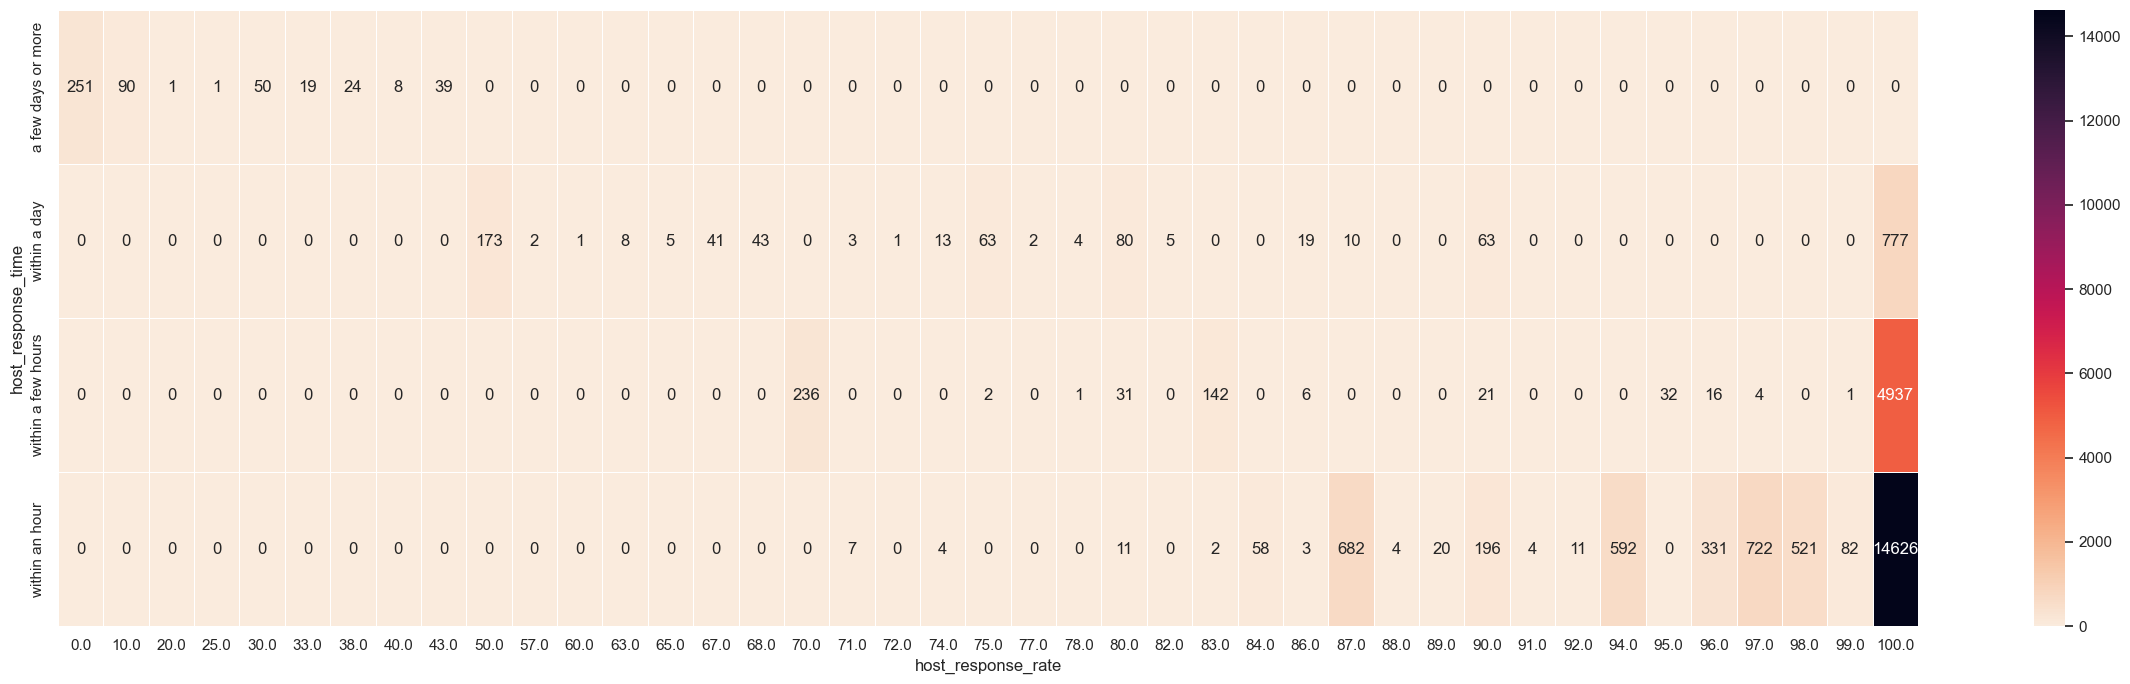

In [89]:
# Set the figure size (width, height)
plt.figure(figsize=(30, 8))

# Create the heatmap
sns.heatmap(host_response_n_review_1b_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

## After analysing the information above, we can filter the dataset down by 1 bed, 1 bath listings with host that response rate is 100% and within  an hour

In [84]:
listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f


In [91]:
filtered_listing_7_df =  listing_7_df[(listing_7_df['bathrooms']==1) & 
                                      (listing_7_df['bedrooms']==1) & 
                                      (listing_7_df['host_response_rate']=='100%') & 
                                      (listing_7_df['host_response_time']=='within an hour')]
filtered_listing_7_df

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
447,566668,COSY & CHIC STUDIO SEVRES BABYLONE/ST GERMAIN,3015724,2012-07-22,"Paris, France",within an hour,100%,Palais-Bourbon,48.850280,2.317190,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""L...",180.0,3,90,88,4.88,4.93,4.98,4.97,4.91,4.87,4.79,t
1025,1070851,Saint Germain des Prés in Paris !,4958426,2013-02-04,"Paris, France",within an hour,100%,Palais-Bourbon,48.856966,2.332087,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Clothing storage: walk-in closet"", ""Bathtub""...",220.0,1,730,208,4.83,4.83,4.90,4.96,4.96,4.98,4.75,f
1204,1143342,One-bedroom flat near Eiffel Tower,6269160,2013-05-07,"Paris, France",within an hour,100%,Palais-Bourbon,48.859480,2.307570,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Stove"", ""Coffee"", ""Dishes ...",112.0,2,28,119,4.54,4.45,4.25,4.83,4.86,4.87,4.51,t
1214,1232327,"Private room, Paris 7th district",6720658,2013-06-03,"Lausanne, Switzerland",within an hour,100%,Palais-Bourbon,48.854230,2.306230,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Cooking basi...",48.0,10,120,54,4.65,4.78,4.65,4.85,4.87,4.96,4.69,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94156,1212926520033373190,Cosy Home St Germain,541551090,2023-10-12,"Paris, France",within an hour,100%,Palais-Bourbon,48.858200,2.323810,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Elevator"", ""Stove"", ""Coffe...",150.0,2,365,3,4.00,3.67,5.00,4.00,4.33,4.67,4.00,t
94615,1220030921637451236,Appartement au Bon Marché,595289178,2024-08-10,no_location,within an hour,100%,Palais-Bourbon,48.852337,2.323452,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Kitchen"", ""Exterior security cameras on prop...",135.0,1,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
94724,1222246732366936452,A Fancy 1-BR with Services on the Champ-de-Mars,572796284,2024-04-17,no_location,within an hour,100%,Palais-Bourbon,48.857387,2.301658,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Pack \u2019n play/Travel crib - always at th...",263.0,2,1125,1,5.00,5.00,5.00,5.00,4.00,5.00,5.00,t
94846,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t


## Looking into how many people the airbnb should accomodate

In [97]:
filtered_listing_7_df.groupby('accommodates').agg({'number_of_reviews':'sum'})

,number_of_reviews
accommodates,
1,733
2,6404
3,1939
4,5060
5,457
6,33


<Axes: xlabel='accommodates', ylabel='number_of_reviews'>

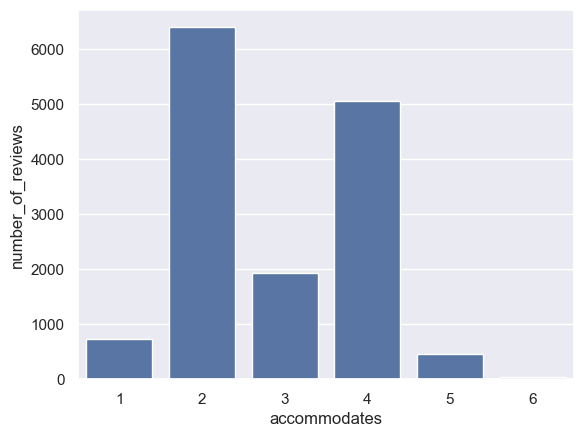

In [98]:
sns.barplot(data=filtered_listing_7_df.groupby('accommodates').agg({'number_of_reviews':'sum'}), x='accommodates', y='number_of_reviews')	

### How many beds are the most popular?

In [106]:
gb_filtered_listing_7_df = filtered_listing_7_df.groupby(['accommodates','beds']).agg({'number_of_reviews':'sum'}).reset_index()
# Convert the 'beds' column to numeric
gb_filtered_listing_7_df['beds'] = gb_filtered_listing_7_df['beds'].astype(int)

# Check the result
gb_filtered_listing_7_df

,accommodates,beds,number_of_reviews
0,1,1,733
1,2,0,23
2,2,1,6111
3,2,2,265
4,2,3,5
5,3,0,18
6,3,1,390
7,3,2,1009
8,3,3,298
9,3,5,224


### Heat map is again the to visualise this

In [110]:
gb_filtered_listing_7_pivot = gb_filtered_listing_7_df.pivot(index="beds", columns="accommodates", values="number_of_reviews")
gb_filtered_listing_7_pivot.fillna(0, inplace=True)
gb_filtered_listing_7_pivot

accommodates,1,2,3,4,5,6
beds,,,,,,
0,0.0,23.0,18.0,32.0,0.0,0.0
1,733.0,6111.0,390.0,551.0,1.0,0.0
2,0.0,265.0,1009.0,3994.0,0.0,5.0
3,0.0,5.0,298.0,483.0,277.0,28.0
4,0.0,0.0,0.0,0.0,179.0,0.0
5,0.0,0.0,224.0,0.0,0.0,0.0


<Axes: xlabel='accommodates', ylabel='beds'>

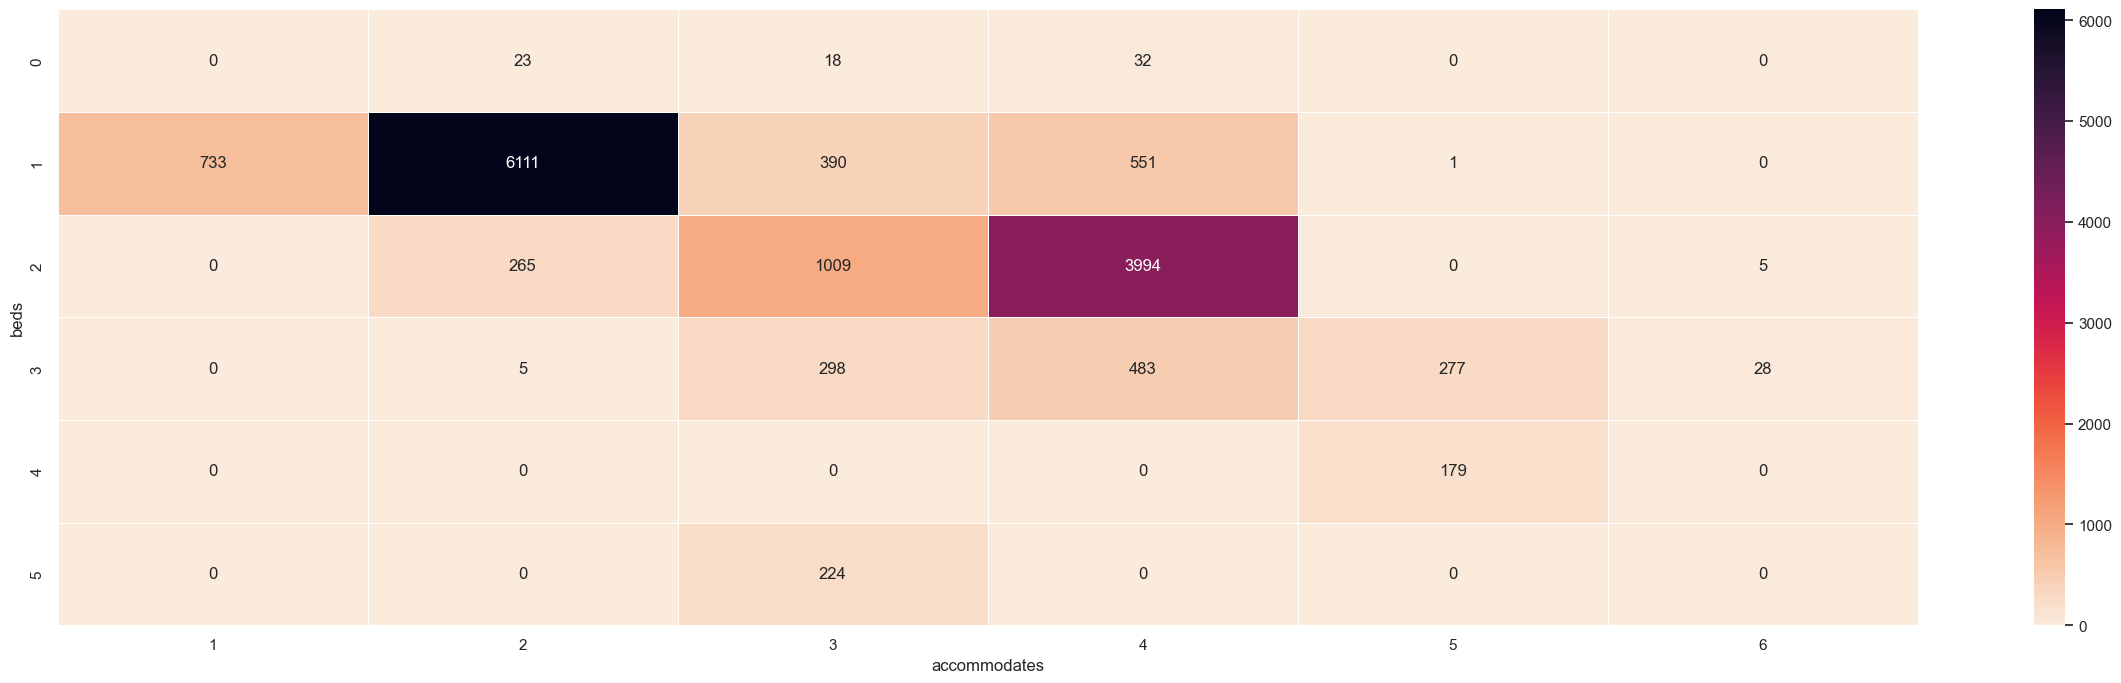

In [111]:
# Set the figure size (width, height)
plt.figure(figsize=(30, 8))

# Create the heatmap
sns.heatmap(gb_filtered_listing_7_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

### try displot?

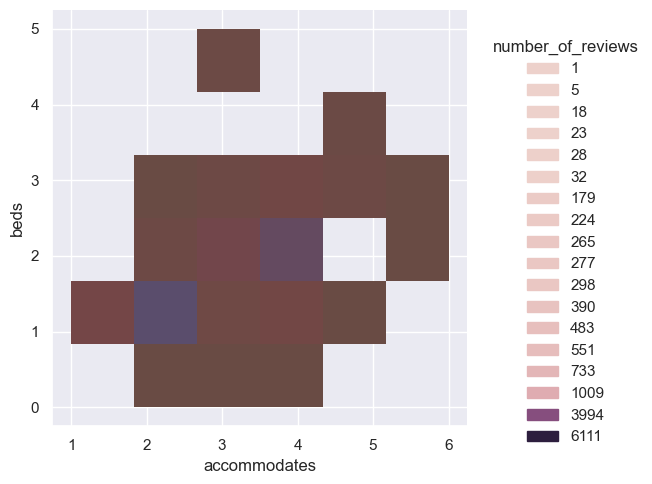

In [117]:
sns.displot(data=gb_filtered_listing_7_df, x='accommodates', y='beds', hue='number_of_reviews')

### We seems to ahve a choice here, but if martin wants something easy to manage, accomodate 2 and have 1 bed is the best option, 

## Looking at max and minimum stays

In [113]:
filtered_listing_7_df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
447,566668,COSY & CHIC STUDIO SEVRES BABYLONE/ST GERMAIN,3015724,2012-07-22,"Paris, France",within an hour,100%,Palais-Bourbon,48.850280,2.317190,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""L...",180.0,3,90,88,4.88,4.93,4.98,4.97,4.91,4.87,4.79,t
1025,1070851,Saint Germain des Prés in Paris !,4958426,2013-02-04,"Paris, France",within an hour,100%,Palais-Bourbon,48.856966,2.332087,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Clothing storage: walk-in closet"", ""Bathtub""...",220.0,1,730,208,4.83,4.83,4.90,4.96,4.96,4.98,4.75,f
1204,1143342,One-bedroom flat near Eiffel Tower,6269160,2013-05-07,"Paris, France",within an hour,100%,Palais-Bourbon,48.859480,2.307570,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Stove"", ""Coffee"", ""Dishes ...",112.0,2,28,119,4.54,4.45,4.25,4.83,4.86,4.87,4.51,t
1214,1232327,"Private room, Paris 7th district",6720658,2013-06-03,"Lausanne, Switzerland",within an hour,100%,Palais-Bourbon,48.854230,2.306230,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Cooking basi...",48.0,10,120,54,4.65,4.78,4.65,4.85,4.87,4.96,4.69,f


In [115]:
max_min_night_df = filtered_listing_7_df.groupby(['minimum_nights','maximum_nights']).agg({'number_of_reviews':'sum'}).reset_index()
max_min_night_df

,minimum_nights,maximum_nights,number_of_reviews
0,1,1,28
1,1,3,62
2,1,5,333
3,1,7,23
4,1,10,129
...,...,...,...
81,30,270,1
82,30,300,29
83,30,305,1
84,30,365,20


In [119]:
max_min_night_pivot = max_min_night_df.pivot(index="minimum_nights", columns="maximum_nights", values="number_of_reviews")
max_min_night_pivot.fillna(0, inplace=True)
max_min_night_pivot

maximum_nights,1,3,5,6,7,10,14,15,18,20,21,22,25,28,30,31,40,45,50,60,80,89,90,99,100,120,125,180,200,270,300,305,360,365,700,730,1000,1125
minimum_nights,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,28.0,62.0,333.0,0.0,23.0,129.0,210.0,0.0,7.0,5.0,474.0,0.0,0.0,3.0,38.0,0.0,0.0,8.0,0.0,129.0,34.0,0.0,0.0,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,922.0,0.0,208.0,0.0,1926.0
2,0.0,0.0,0.0,0.0,0.0,246.0,0.0,8.0,0.0,81.0,0.0,21.0,0.0,335.0,651.0,0.0,0.0,0.0,5.0,1.0,0.0,24.0,14.0,292.0,4.0,14.0,0.0,25.0,0.0,0.0,9.0,0.0,45.0,1687.0,0.0,115.0,0.0,2362.0
3,0.0,0.0,0.0,93.0,34.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,194.0,104.0,0.0,2.0,0.0,0.0,0.0,0.0,198.0,62.0,0.0,61.0,21.0,61.0,0.0,0.0,62.0,0.0,0.0,416.0,0.0,8.0,0.0,575.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,99.0,0.0,32.0,0.0,236.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.0,0.0,0.0,187.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,49.0,0.0,0.0,0.0,170.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,129.0,0.0,0.0,0.0,0.0,0.0,330.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,259.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,15.0,0.0,0.0,0.0


<Axes: xlabel='maximum_nights', ylabel='minimum_nights'>

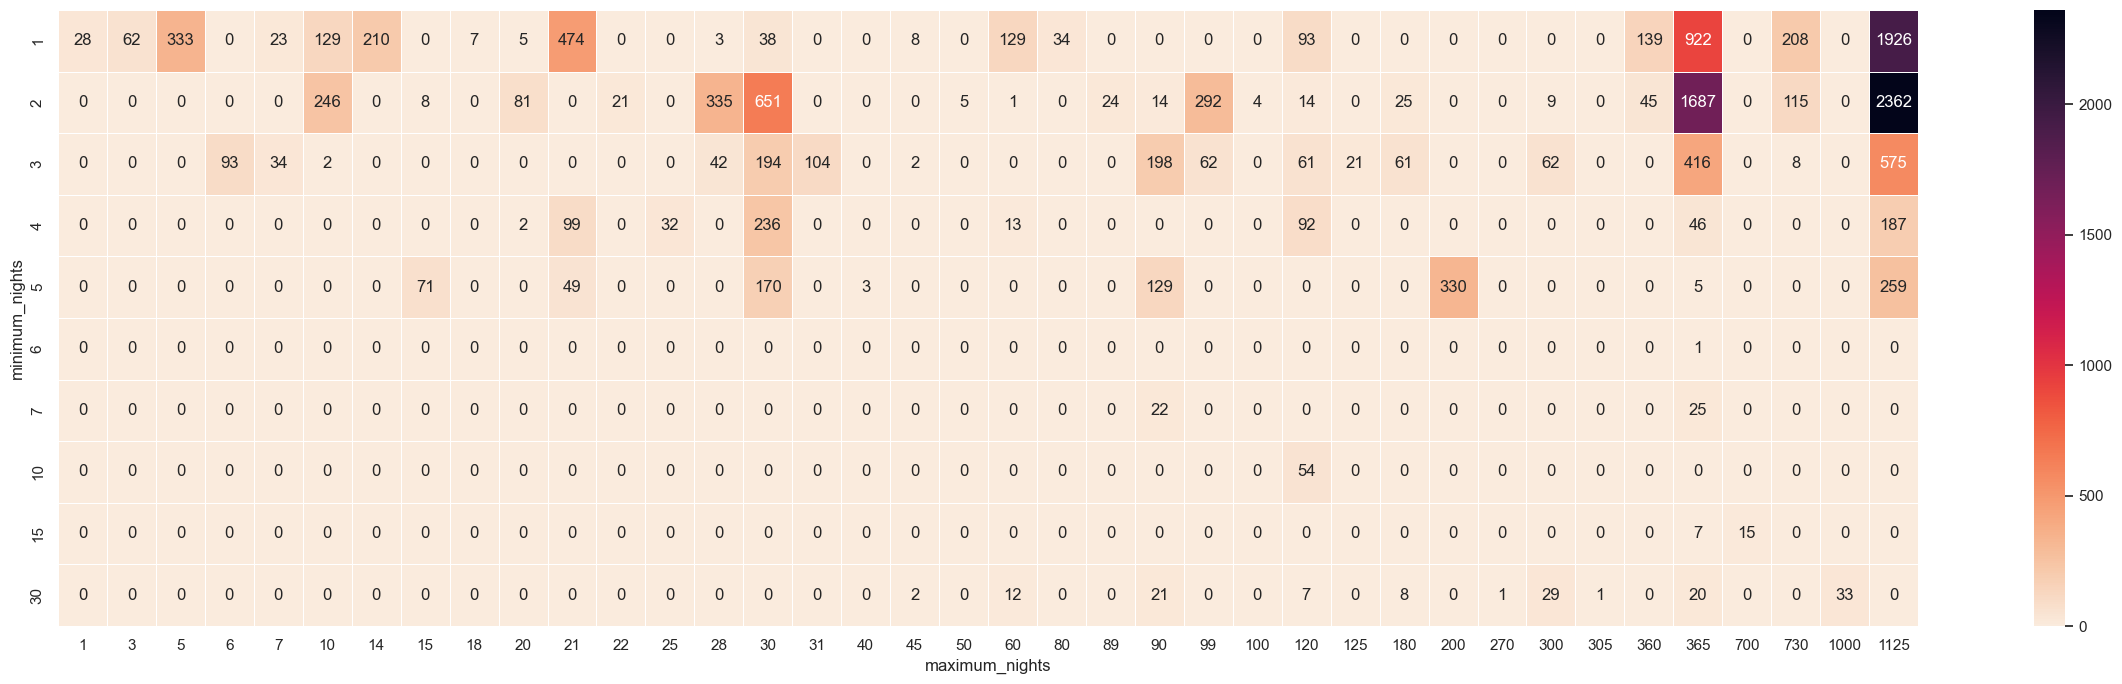

In [120]:
# Set the figure size (width, height)
plt.figure(figsize=(30, 8))

# Create the heatmap
sns.heatmap(max_min_night_pivot, annot=True, fmt='g', linewidths=.5,cmap='rocket_r')

In [121]:
filtered_listing_7_df

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
447,566668,COSY & CHIC STUDIO SEVRES BABYLONE/ST GERMAIN,3015724,2012-07-22,"Paris, France",within an hour,100%,Palais-Bourbon,48.850280,2.317190,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""L...",180.0,3,90,88,4.88,4.93,4.98,4.97,4.91,4.87,4.79,t
1025,1070851,Saint Germain des Prés in Paris !,4958426,2013-02-04,"Paris, France",within an hour,100%,Palais-Bourbon,48.856966,2.332087,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Clothing storage: walk-in closet"", ""Bathtub""...",220.0,1,730,208,4.83,4.83,4.90,4.96,4.96,4.98,4.75,f
1204,1143342,One-bedroom flat near Eiffel Tower,6269160,2013-05-07,"Paris, France",within an hour,100%,Palais-Bourbon,48.859480,2.307570,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Stove"", ""Coffee"", ""Dishes ...",112.0,2,28,119,4.54,4.45,4.25,4.83,4.86,4.87,4.51,t
1214,1232327,"Private room, Paris 7th district",6720658,2013-06-03,"Lausanne, Switzerland",within an hour,100%,Palais-Bourbon,48.854230,2.306230,Private room in rental unit,Private room,2,1.0,1 private bath,1.0,1.0,"[""Lock on bedroom door"", ""Wifi"", ""Cooking basi...",48.0,10,120,54,4.65,4.78,4.65,4.85,4.87,4.96,4.69,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94156,1212926520033373190,Cosy Home St Germain,541551090,2023-10-12,"Paris, France",within an hour,100%,Palais-Bourbon,48.858200,2.323810,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Elevator"", ""Stove"", ""Coffe...",150.0,2,365,3,4.00,3.67,5.00,4.00,4.33,4.67,4.00,t
94615,1220030921637451236,Appartement au Bon Marché,595289178,2024-08-10,no_location,within an hour,100%,Palais-Bourbon,48.852337,2.323452,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Kitchen"", ""Exterior security cameras on prop...",135.0,1,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
94724,1222246732366936452,A Fancy 1-BR with Services on the Champ-de-Mars,572796284,2024-04-17,no_location,within an hour,100%,Palais-Bourbon,48.857387,2.301658,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Pack \u2019n play/Travel crib - always at th...",263.0,2,1125,1,5.00,5.00,5.00,5.00,4.00,5.00,5.00,t
94846,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t


<Axes: xlabel='price', ylabel='number_of_reviews'>

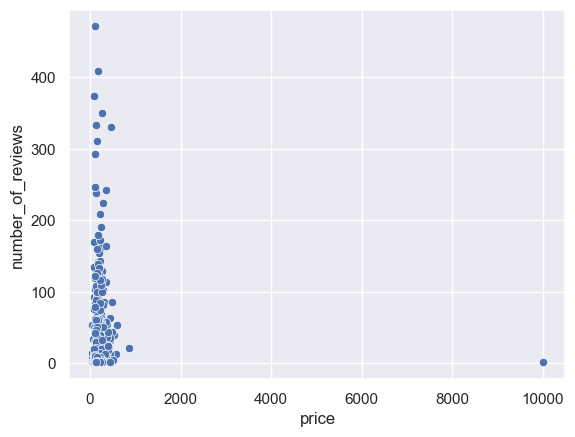

In [122]:
sns.scatterplot(data=filtered_listing_7_df, x='price', y='number_of_reviews')

<Axes: xlabel='price', ylabel='number_of_reviews'>

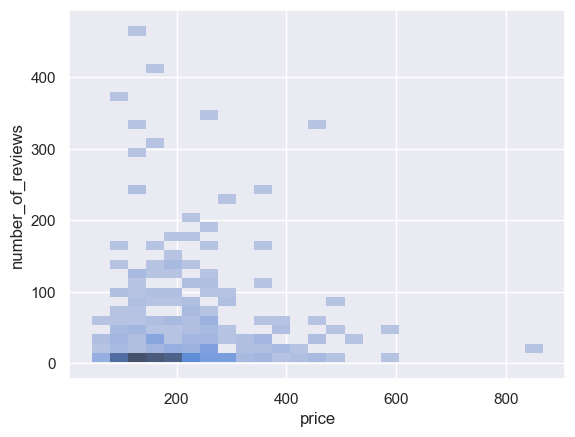

In [126]:
sns.histplot(data=filtered_listing_7_df[filtered_listing_7_df['price'] < 2000], x='price', y='number_of_reviews')